Z= 1040 2^p-- False
T0= 2.6 T= 2.56
Z= 1024 2^p-- True
кількість періодів функції f-- 10.24
т. Н.-К. 400 >= 32 True
v= 4 Гц; T= 2.56 с; Z= 1024
--- 1.2759983539581299 seconds dpf---
--- 0.014000177383422852 seconds dpf1---
--- 0.0020008087158203125 seconds fft---
--- 2.0329971313476562 seconds ndpf ---
--- 0.0 seconds ifft ---
кількість кроків до основного тону по осі частот 10 ; точно 10.24


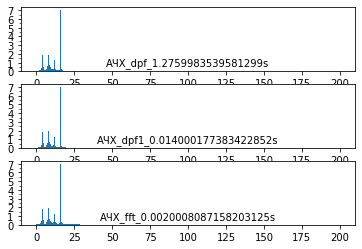

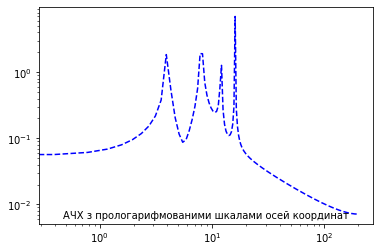

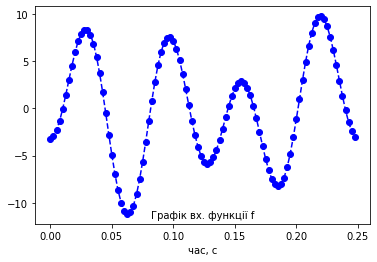

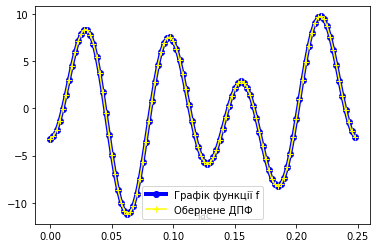

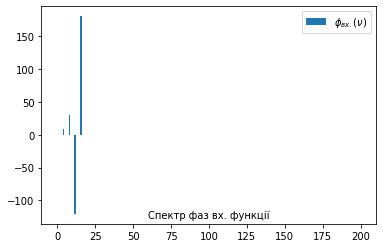

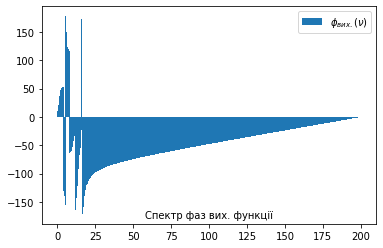

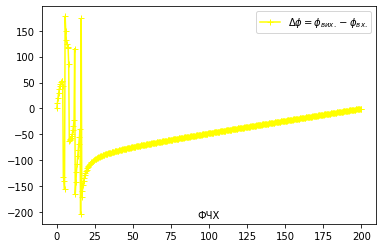

In [18]:
# ПОРІВНЯННЯ АЛГОРИТМІВ
import math
from math import e, pi, sin, cos, log
import time
# псевдонім
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fftpack import fft, ifft
import sys

def W(N, l):
    m = (-pi*l/N)*2j
    return e ** (m)

def dpf(x):
    N=len(x)
    S=[]
    for i in range(N):
        Sn=0
        for k in range(N):
            Sn=Sn + x[k]*W(N, k*i)
        S.append(Sn)
    return S

#обернене ДПФ
def ndpf(x):
    N=len(x)
    S=[]
    for i in range(N):
        Sn=0
        for k in range(N):
            Sn=Sn + x[k]*W(N, -k*i)
        S.append(Sn/N)      
    return S

def dpf1(ff):
    N = len(ff)
    if N <= 1:
        return ff
    fp = dpf1(ff[0::2])
    fnp = dpf1(ff[1::2])
    NP = [W(N, k) * fnp[k] for k in range(N // 2)]
    Cn = [fp[k] + NP[k] for k in range(N // 2)] + [fp[k] - NP[k] for k in range(N // 2)]
    return Cn

#степінь 2?
def step(a):
    p = log(a, 2)
    if p == int(p):
        return True
    else:
        return False
    
#модуль комплексного числа, із врахуванням знаку
def Real(x):
    fff=[]
    for i in range(Z):
        if x[i].real>0:
            fff.append(abs(x[i]))
        else:
            fff.append(-abs(x[i]))
    return fff

#пилкоподібна функція фази, - для обчислення початкової фази вхідної функції відповідної гарманіки
#фаза лежить в межах від -π до π
def faza(d):
    if d>0:
        while d>pi:
            d=d-2*pi
    elif d<0:
        while d<-pi:
            d=d+2*pi
    return d        
            
#v - частота основного тону в Гц (власна частота); 
v = 4

# fps -- частота дискретизації сигналу - кількість значень сигналу у одній секунді
# frames per second - кадрів в секунду 
fps=400

# fps>=2*v -- теорема Найквіста-Котельникова
# щоб повністю відтворити сигнал необхідно, щоб 
# частота дискретизації (згідно теореми) була принаймні в 2 рази більшою 
# за максимальну частоту звуку, який людина може сприймати (20-20000Гц). Тобто fps>=20000*2=40000
# 32768=2^15

# період вибірки - відстань в часі між 2-ма найблищими значеннями
dT=1/fps

# тривалість сигналу у секундах
T = 2.6
T0 = T
# має виконуватися умова: загальна кількість точок у сигналі Z=fps*T=(2^p), отже для тривалості сигналу T=(2^p)/fps

#Z - загальна кількість точок у сигналі; кількість значень на відрізку v*T
Z=int(fps*T)
print('Z=',Z, '2^p--',step(Z))

#перевірка умови для Z (скорочення тривалості сигналу)
if not step(Z):
    p=int(log(Z, 2))
    T=(2**p)/fps
    print('T0=',T0, 'T=',T)
    Z=int(fps*T)
    print('Z=',Z, '2^p--',step(Z))

# кількість періодів функції f (бажано, щоб була цілим числом, інакше - розтікання спектру!)
print('кількість періодів функції f--',v*T)

# вісь часу
# ділимо відрізок 0..T на Z рівних частин
# [0..Z]*dT
t=np.arange(Z)*dT
#t = np.linspace(0, T, Z) - (однаковий крок) не працює (дає багато 'шуму' після аналізу!?)

f=[]
# досліджувана функція
for i in range(Z):   
    f.append(2*sin(2*pi*v*t[i]+8)+3*cos(4*pi*v*t[i]-100)+1.5*sin(6*pi*v*t[i]+100)-7*cos(8*pi*v*t[i]))
    #f(t)=2sin(2π(1ν)t+8)+3cos(2π(2ν)t-100)+1.5sin(2π(3ν)t+100)-7cos(2π(4ν)t)
#f=2*np.sin(2*pi*v*t+8)+3*np.cos(4*pi*v*t-100)+1.5*np.sin(6*pi*v*t+100)-7*np.cos(8*pi*v*t) - без циклу for...
                     
print('т. Н.-К.',fps, '>=', 2*(4*v), fps>=2*(4*v))
print('v=',v,'Гц; T=',T,'с; Z=',Z)

#поточна глибина рекурсії
# print(sys.getrecursionlimit())
# sys.setrecursion(5000)
# sys.setrecursionlimit(10000)
    
start = time.time()
y_1=dpf(f)
end = time.time()
t_1=end - start
print("--- %s seconds dpf---" % t_1)

start = time.time()
y_2=dpf1(f)
end = time.time()
t_2=end - start
print("--- %s seconds dpf1---" % t_2)

start = time.time()
y_3=fft(f)
end = time.time()
t_3=end - start
print("--- %s seconds fft---" % t_3)

#обернене ДПФ
start = time.time()
y_4=ndpf(y_3)
end = time.time()
t_4=end - start
print("--- %s seconds ndpf ---" % t_4)

#вбудовананий модуль оберненого ДПФ
start = time.time()
y_5=ifft(y_3)
end = time.time()
t_5=end - start
print("--- %s seconds ifft ---" % t_5)

L1=len(y_1)
L2=len(y_2)
L3=len(y_3)

#y[i] - амплітуда і-ї частоти ("мода")
y1=[]
y2=[]
y3=[]

for i in range(L1):
    y1.append(abs(y_1[i])/(L1/2))
for i in range(L2):
    y2.append(abs(y_2[i])/(L2/2))

#для фази вихідного сигналу 
fk=[]
#максимальне значення аргумента комплексного числа
maxY_3=max(map(abs, y_3/(L3/2)))
#s=list(map(abs, y_3))
#print(s)
#print('max', maxY_3)
for i in range(L3):
    r=y_3[i]/(L3/2)
    y3.append(abs(r))
    #занулюємо дуже малі значення, інакше буде зашумленмй спектр фаз
    if abs(r)<maxY_3/10000:
        fk.append(0)
    else:
        #фаза у градусах
        fk.append(math.atan2(r.imag, r.real)*180/pi)

#обернене ДПФ
f1=Real(y_5)
        
#осі частот, відповідно до кількості вхідних значень; Vi=i/T
x1 = np.linspace(0, int((L1)/T), L1)
x2 = np.linspace(0, int((L2)/T), L2)
x3 = np.linspace(0, int((L3)/T), L3)

#f(t)=2sin(2π(1ν)t+8)+3cos(2π(2ν)t-100)+1.5sin(2π(3ν)t+100)-7cos(2π(4ν)t)
#початкові фази і-ї гармоніки вхідного сигналу у градусах; f=Acos(2πνt+φ)+... (ряд у косинусах); sinx=cos(x-π/2)
fk0=[0 for i in range(Z)]

#крок частоти 
dv=(L1)/(T*Z)
#кількість кроків частот, які вкладаються в основному тоні (може вийти не ціла кількість кроків - дробова частота)
vv=round(v/dv)
print('кількість кроків до основного тону по осі частот', vv, '; точно', v/dv)

fk0[1*vv]=faza(8-pi/2)*180/pi
fk0[2*vv]=faza(-100)*180/pi
fk0[3*vv]=faza(100-pi/2)*180/pi
fk0[4*vv]=pi*180/pi

#fk0[1*v]=math.acos(cos(8-pi/2))
#fk0[2*v]=math.acos(cos(-100))
#fk0[3*v]=math.acos(cos(100-pi/2))
#fk0[4*v]=math.acos(-cos(0))


#matplotlib inline - магічна команда
#графік необхідно побудувати все в тій же оболонці jupyter, але тепер він виводиться як звичайна картинка, а не інтерактивний графік
%matplotlib inline

# figure - вікно, рисунок на якому будуть графіки
# axes - сам графік, система координат
fig = plt.figure()
# розкреслюємо рисунок на 3 частини
# вставляємо графік в першу комірку
ax1 = fig.add_subplot(3, 1, 1)
# вставляємо графік в другу комірку
ax2 = fig.add_subplot(3, 1, 2)
# вставляємо графік в третю комірку
ax3 = fig.add_subplot(3, 1, 3)

#в зв'язку із симетрією ДПФ
Z2=int(Z/2)

#r-(raw) необроблені рядки
#print(r'123\n567')

ax1.set_title(r'АЧХ_dpf_'+str(t_1)+'s', fontsize=10, x=0.5, y=0)
# Встановлюємо інтервал основних поділок
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
# Встановлюємо інтервал допоміжних поділок
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.bar(x1[:Z2], y1[:Z2])

ax2.set_title(r'АЧХ_dpf1_'+str(t_2)+'s', fontsize=10, x=0.5, y=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.bar(x2[:Z2], y2[:Z2])

ax3.set_title(r'АЧХ_fft_'+str(t_3)+'s', fontsize=10, x=0.5, y=0)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax3.bar(x3[:Z2], y3[:Z2])
fig.savefig('4saved_figure_3_1.png', dpi = 1000)

#логарифмічна* шкала осей координат (на графіку буде видно "шуми" ДПФ)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'АЧХ з прологарифмованими шкалами осей координат', fontsize=10, x=0.5, y=0)
ax.plot(x3[:Z2], y3[:Z2], color='blue',  linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')
fig.savefig('4saved_figure_3_2.png', dpi = 1000)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Графік вх. функції f', fontsize=10, x=0.5, y=0)
#один період функції (кількість точок в одному періоді) t0=tmax=1/min(v,2v,3v,4v)
t0=int(fps/v)
ax.plot(t[:t0], f[:t0], color='blue',  marker='o', linestyle='--')
ax.set_xlabel('час, с')
fig.savefig('4saved_figure_3_3.png', dpi = 1000)

#Порівняння графіка вх. функції із графіком оберненого ДПФ
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Час', fontsize=10, x=0.5, y=0)
ax.plot(t[:t0], f[:t0], color='blue', marker='o', label="Графік функції f", linewidth=4)
plt.legend()
ax.plot(t[:t0], f1[:t0], color='yellow', marker='+', linestyle='-',label="Обернене ДПФ")
plt.legend()
fig.savefig('4saved_figure_3_4.png', dpi = 1000)

#спектр фаз коливаньм вх. функції 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Спектр фаз вх. функції', fontsize=10, x=0.5, y=0)
#ax.plot(x3[:Z2], fk0[:Z2], label=r'$\phi_{вх.}(\nu)$')
ax.bar(x3[:Z2], fk0[:Z2], label=r'$\phi_{вх.}(\nu)$')
plt.legend()
fig.savefig('4saved_figure_3_5.png', dpi = 1000)

#спектр фаз коливань вих. функції 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Спектр фаз вих. функції', fontsize=10, x=0.5, y=0)
#ax.plot(x3[:Z2], fk[:Z2], label=r'$\phi_{вих.}(\nu)$')
ax.bar(x3[:Z2], fk[:Z2], label=r'$\phi_{вих.}(\nu)$')
plt.legend()
fig.savefig('4saved_figure_3_6.png', dpi = 1000)

#Фазо-частотна характеристика - зсув фази вихідного сигналу по відношенню до вхідного сигналу як функція частоти
fk1=[]
for i in range(Z2):
    fk1.append(round(fk[i]-fk0[i],5))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'ФЧХ', fontsize=10, x=0.5, y=0)
ax.plot(x3[:Z2], fk1[:Z2], color='yellow', marker='+', linestyle='-',label=r'$\Delta \phi = \phi_{вих.}-\phi_{вх.}$' )
plt.legend()
fig.savefig('4saved_figure_3_7.png', dpi = 1000)
